# Student Performance Dataset: Exploratory Data Analysis

In this project, we are going to analyze the Student Performance dataset from UCI Machine Learning Repository.

We will try to answer the following questions;

* Does alcohol consumption affect student performance?
* Q2: Does additional classes improve student grades?
* Q3: Activities/Health
* Q4: Address/Pstatus
* Q5: Higher Education

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("student-mat.csv", sep=";")

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

The dataset does not have missing values.

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Many of the variables in the dataset are categorical, represented as numeric values.

## Does alcohol consumption affect student performance?

In this question we want to oberserve overall alcohol consumption. For this reason, we will combine both weekday and weekend alcohol consumption.

In [6]:
df['Dalc'] = df['Dalc'] + df['Walc']

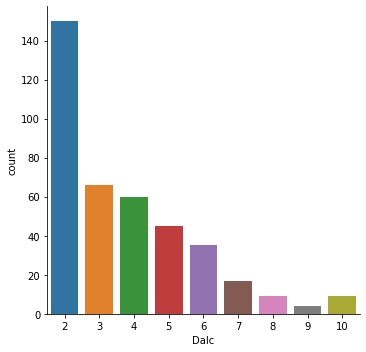

In [7]:
sns.catplot('Dalc', data=df, kind='count')

From this plot, we can see that all students in the dataset consume alcohol at least twice a week.

In [36]:
avg = round(sum(df.G3) / len(df), 2)
print("Student grade average is {}. Roughly a {}.".format(avg, avg*5))

Student grade average is 10.42. Roughly a 52.1.


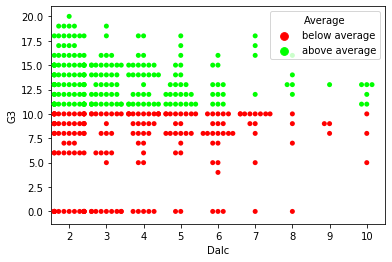

In [37]:
df['Average'] = ['above average' if i > avg else 'below average' for i in df.G3]
graph = sns.swarmplot('Dalc', 'G3', hue = 'Average', data=df, palette={'above average':'lime', 'below average': 'red'})

From the plot, we can see that a majority of those that scored above average do not drink as heavily compared to those that do.

In [44]:
cor = round(np.corrcoef(x=np.array([df.G3, df.Dalc]))[0,1], 4)
print("The correlation coefficient between final grade score and drinking intensity is {}.".format(cor))

The correlation coefficient between final grade score and drinking intensity is -0.0582.


This coincides with our scatterplot where drinking has a strong ($\pm$ 0.5 - $\pm$ 1) negative correlation with student grades.

## Question 2:

## Question 3:

## Question 4:

## Question 5: